# Argility - Senior Data Scientist Assessment

### Brief Task Explanation

This assignment is provided as a way to explore the price elasticity techniques for the
attached dataset (assignment.csv) and then advise business based on elasticities of the
items (sku_cde).

You are given 2 years of weekly item sales data, and asked to create a presentation/report
that would advise business based on the findings from the price elasticity of the items.
In your presentation/report, you should include what you understand by price elasticity of
demand and interpret the calculated price elasticity of the items based on the
statistical techniques you applied. For example: Is sku_cde (A) Elastic or Inelastic for promo
and regular demand? Should we increase or decrease the prices based on the elasticities
(promo and regular) of the items?

### Data Fields

date_week - Date of the sale data.

sku_cde - Item ID

sales - Number of items sold at a particular store on a particular date.

cost_price - Cost price of the item

regular_price - Selling price of the item

regular_volume - Quantity sold at regular price

promo_price - DIscount Price of the item

promo_volume - Quantity sold at promo price

### Loading Libraries

In [1]:
%matplotlib inline

# Standard libraries
import datetime
import numpy as np
import pandas as pd

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics Libraries
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display no warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

### What is Price Elasticity of Demand (PED):
Price elasticity of demand (PED) is a measure that has been used in econometric to show how demand of a particular product changes when the price of the product is changed. More particularly, it measures the % change in demand of a product when the price changes by 1%.

let’s talk about how we interpret PED,

PED of greater than 1 (absolute value) shows highly elastic product (sku_cde). In other words, the change in price will cause a more than proportionate change in demand. This is generally the case with non-essential or products (sku_cde) such as the example shown below. On the other hand, PED of less than 1 shows relatively inelastic products such as sku_cde. Furthermore, for most product PED will be negative, i.e. when the price is increased demand falls.

### Import Sales Dataset

In [2]:
data = pd.read_csv("Senior Data Assignment.csv", parse_dates=True, date_parser='date_week')

# Converting date_week column to pandas datetime datatype
data['date_week'] = pd.to_datetime(data['date_week'])

In [3]:
data.head(5)

,date_week,sku_cde,cost_price,regular_price,regular_volume,promo_price,promo_volume
0,2020-02-09,62875832,68.0,140.0,10.0,NaN,0.0
1,2020-02-09,84630314,180.0,300.0,10.0,NaN,0.0
2,2020-02-09,95208654,26.0,56.0,40.0,NaN,0.0
3,2020-02-09,111708109,80.0,NaN,0.0,109.95,10.0
4,2020-02-16,73267284,94.0,205.0,20.0,NaN,0.0


### Checking Nulls in the dataframe

In [4]:
# Printing the sum of all nulls in the columns
# these nulls have to be removed to make the statistical model work correctly.
print(data.isnull().sum())

# Removing Nulls here by replacing the price and volume by 0, As it is the most appropriate way to fill them.
# Using bfill or ffill can make model more worse. This will make readings go over the actual elasticity.
data = data.fillna(0)

date_week           0
sku_cde             0
cost_price          0
regular_price     166
regular_volume      0
promo_price       604
promo_volume        0
dtype: int64


### Describing basic stats of the dataset for appropriate columns only

In [5]:
data.describe(exclude=["datetime64[ns]","int64"])

,cost_price,regular_price,regular_volume,promo_price,promo_volume
count,851.000000,851.000000,851.000000,851.000000,851.000000
mean,94.408931,148.451234,109.388954,44.128907,91.363102
std,42.363465,97.241644,111.862743,75.923953,222.298207
min,14.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,56.000000,15.000000,0.000000,0.000000
50%,92.000000,180.000000,80.000000,0.000000,0.000000
75%,99.000000,205.000000,170.000000,107.450000,60.000000
max,210.000000,330.000000,620.000000,299.950000,2610.000000


### Formula for Price Elasticity of Demand:

PED refers to the degree of responsiveness of demand for a sku_cde to a change in cost. Lets simply put, it means the degree to which the demand for a sku_cde (product) changes with an increase or decrease in its cost. For example, the demand for a sku_cde (product) increases by 10% due to a decrease in its cost by 5%. This is what it means to change in demand with the change in the price of a sku_cde. 

To calculate the price elasticity of demand for both regular and promo. You have to use the formula here:
<br></br>
<center><b>Percentage change in Quantity demanded / Percentage change in the price</b></center>

So now we have understood the PED formula and definition. Now lets calculate the PED for the given dataset in Python below.

### Calculating the Change in Regular and Promo items

In [6]:
# Here, Using pct_change to Compute the percentage change from the immediately previous row by default. 
# This is useful in comparing the percentage of change in a time series of elements.

# Calculating percent change for regular price and volume
data["regular_price%"] = data['regular_price'].pct_change()
data["regular_volume%"] = data['regular_volume'].pct_change()

# Calculating percent change for promo price and volume
data["promo_price%"] = data['promo_price'].pct_change()
data["promo_volume%"] = data['promo_volume'].pct_change()

### Now calculating the Price elasticity (Regular vs Promo)

In [7]:
# Calculating price elasticity for regular price and volume
data["regular_pe"] = data["regular_volume%"] / data["regular_price%"]

# Calculating price elasticity for promo price and volume
data["promo_pe"] = data["promo_volume%"] / data["promo_price%"]

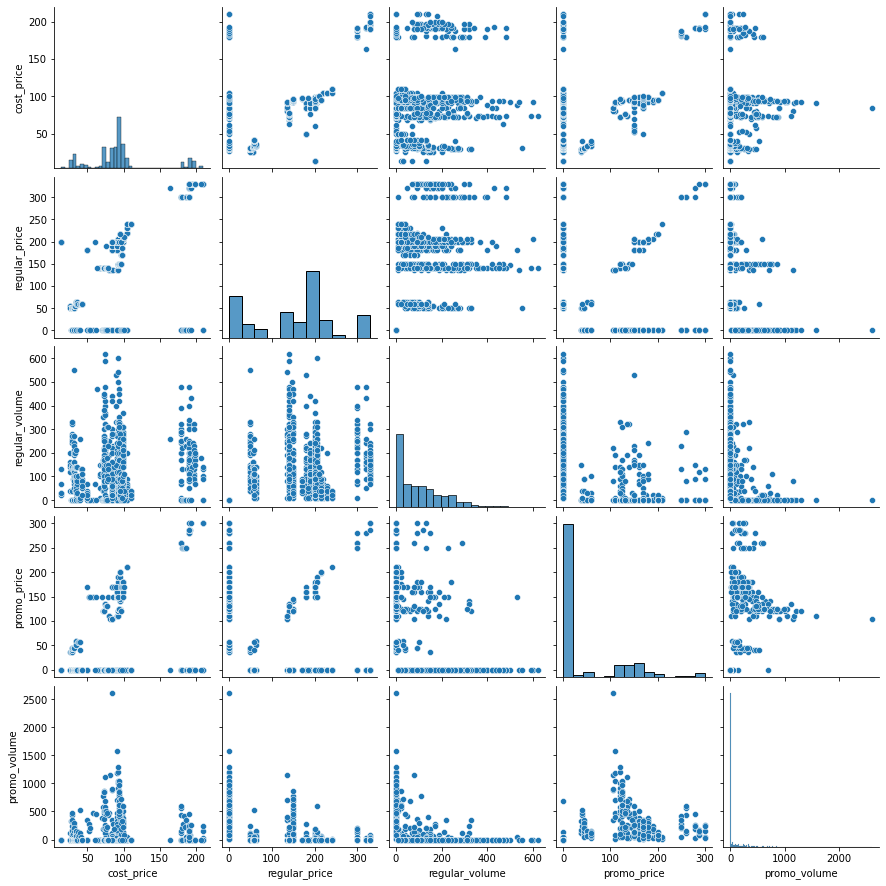

In [8]:
sns.pairplot(data[["date_week", "cost_price", "regular_price","regular_volume","promo_price","promo_volume"]])

(array([71., 81., 91., 83., 89., 85., 94., 81., 82., 94.]),
 array([18301. , 18374.5, 18448. , 18521.5, 18595. , 18668.5, 18742. ,
        18815.5, 18889. , 18962.5, 19036. ]),
 <BarContainer object of 10 artists>)

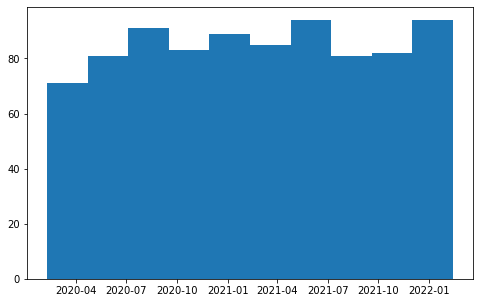

In [9]:
plt.figure(figsize=(8,5))
plt.hist(data.date_week)

Initially, I wanted to explore the data to see if there were any patterns worth noting both Regular and Promo prices. I started by calculating price elasticity for the whole dataset, and created scatter plots for each sku_cde. 

The scatter plots had price on the x axis, and quantity/volume on the y axis, and color hues dependent on sku_cde. These scatter plots were meant to show any price/quantity pattern behavior, as well as showing where the most profitable areas were.

<AxesSubplot:xlabel='regular_price', ylabel='regular_volume'>

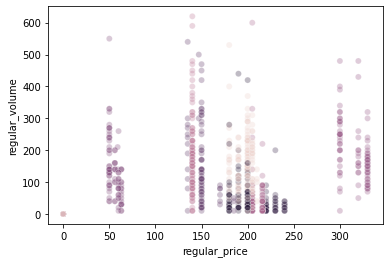

In [10]:
sns.scatterplot(data = data, x = data.regular_price, y = data.regular_volume , hue = 'sku_cde', legend=False, alpha = 0.3)

<AxesSubplot:xlabel='promo_price', ylabel='promo_volume'>

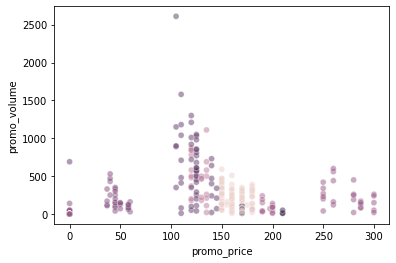

In [11]:
sns.scatterplot(data = data, x = data.promo_price, y = data.promo_volume , hue = 'sku_cde', legend=False, alpha = 0.5)

In [12]:
def create_model_and_find_elasticity(data,price,volume):
    model = ols("{} ~ {}".format(volume,price), data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

### Ordinary Least Squares (OLS):

The ordinary least squares (OLS) method is a linear regression technique that is used to estimate the unknown parameters in a model. The method relies on minimizing the sum of squared residuals between the actual and predicted values.

Observations:

1. The high P values indicate that we cannot reject the null hypothesis that Price has effect on Quantity.
2. Hight R-squared indicates that our model explains a lot of the response variability.
3. In regression analysis, we’d like our regression model to have significant variables and to produce a high R-squared value.
4. We will show graphs to help interpret regression analysis results more intuitively.

Price elasticity of the product: 0.40919135572493504
                            OLS Regression Results                            
Dep. Variable:         regular_volume   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     123.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           8.77e-27
Time:                        17:47:54   Log-Likelihood:                -5163.9
No. Observations:                 851   AIC:                         1.033e+04
Df Residuals:                     849   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

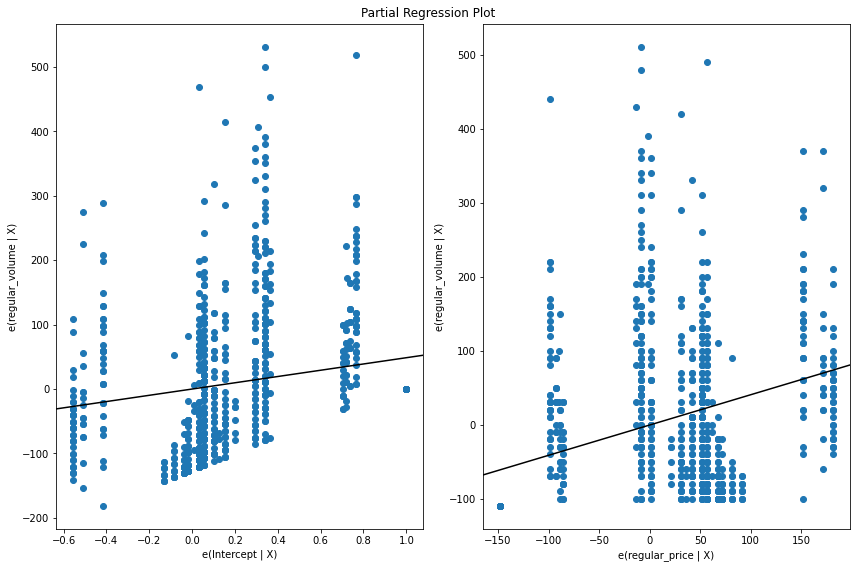

In [13]:
price_elasticity, regular_model = create_model_and_find_elasticity(data, "regular_price", "regular_volume")
data['regular_elasticity'] = price_elasticity

The trend indicates that the predictor variables (Price) provides information about the response (Quantity), and data points do not fall further from the regression line, and the predictions are very precise given a prediction interval that extends from about 30 to 95.

Price elasticity of the product: 1.4779241855588334
                            OLS Regression Results                            
Dep. Variable:           promo_volume   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     290.3
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           3.27e-56
Time:                        17:47:54   Log-Likelihood:                -5680.7
No. Observations:                 851   AIC:                         1.137e+04
Df Residuals:                     849   BIC:                         1.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

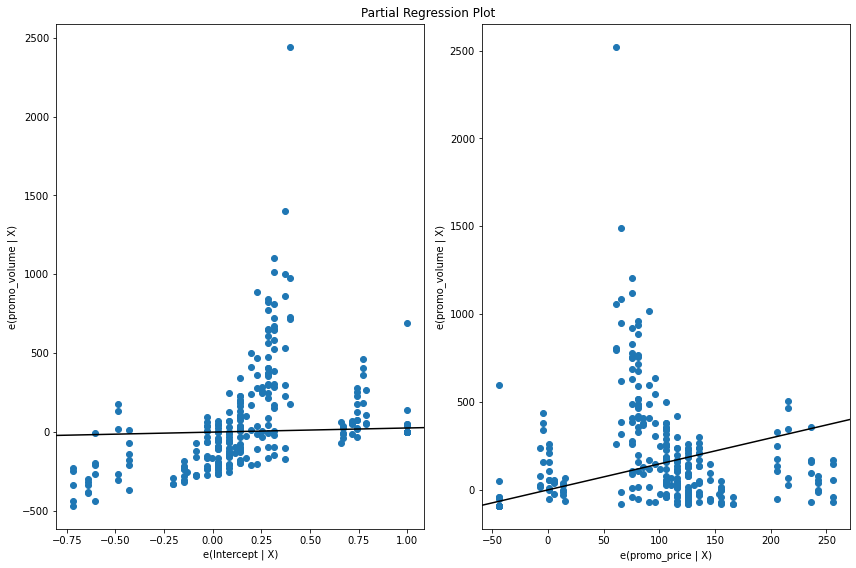

In [14]:
price_elasticity, promo_model = create_model_and_find_elasticity(data, "promo_price", "promo_volume")
data['promo_elasticity'] = price_elasticity

## Component - Component plus Residual (CCPR) Plots

The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

Here you can see that the relationship between the price and the quantity explained by the graph linear line. There are alot od observations we can see on the plot deviating.

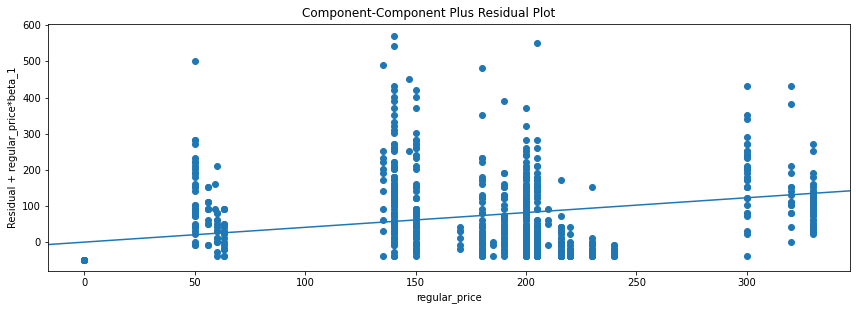

In [15]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(regular_model, fig=fig)

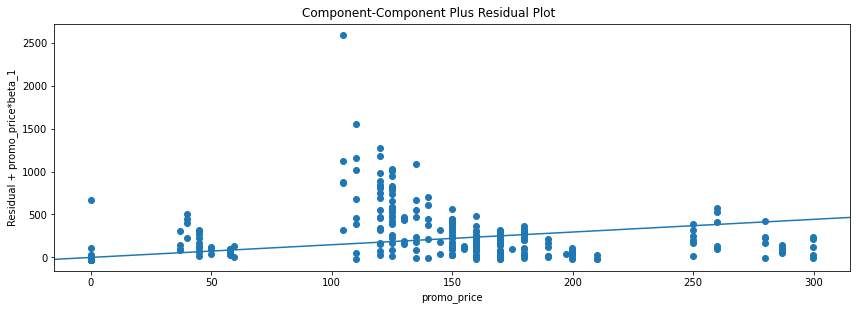

In [16]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(promo_model, fig=fig)

## Regression Plots

We use regression plots to quickly check the model assumptions with respect to single regressor, In our case we use price.

eval_env: 1


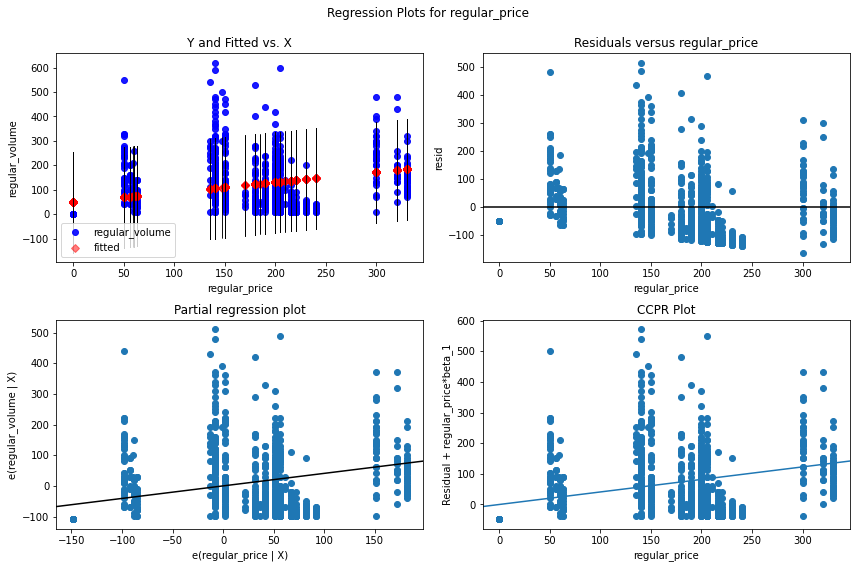

In [17]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(regular_model, 'regular_price', fig=fig)

eval_env: 1


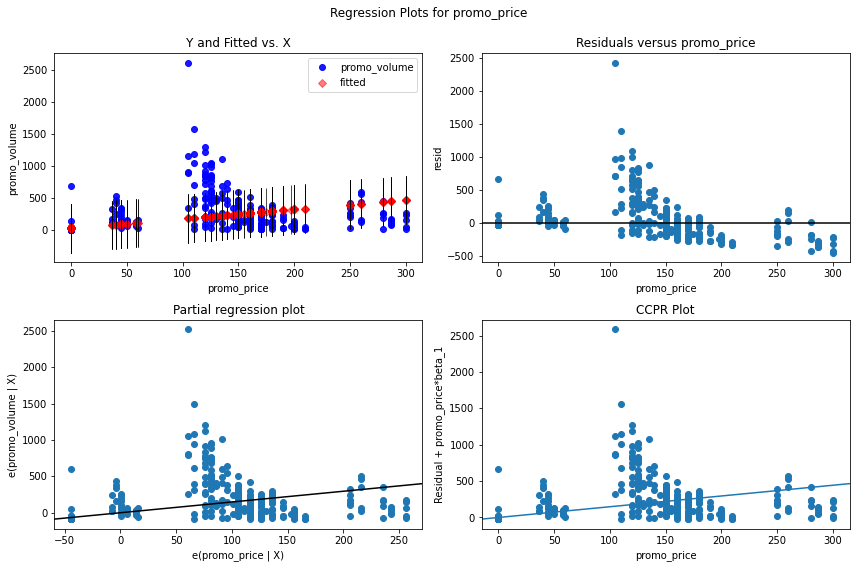

In [18]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(promo_model, 'promo_price', fig=fig)

In [19]:
category = data['sku_cde'].value_counts()
print("Product Category Percentage\n{}\n{}\n Product Category values count\n{}\n{}".format(
      50*"-", (category / len(data.index))[:5] * 100, 50*"-", category[:5]))

Product Category Percentage
--------------------------------------------------
84630314     12.455934
95208654     12.455934
111708109    12.455934
62875832     12.338425
11990782     12.338425
Name: sku_cde, dtype: float64
 Product Category values count
--------------------------------------------------
84630314     106
95208654     106
111708109    106
62875832     105
11990782     105
Name: sku_cde, dtype: int64


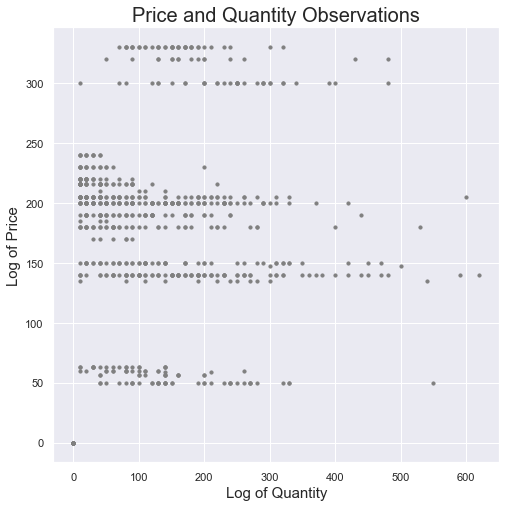

In [20]:
sns.set()
fig_static = plt.figure(figsize = (8,8))
plt.scatter(data['regular_volume'],data['regular_price'], s = 10, c = 'gray')
plt.ylabel('Log of Price', fontsize = 15)
plt.xlabel('Log of Quantity', fontsize = 15)
plt.title('Price and Quantity Observations', fontsize = 20)
plt.show()

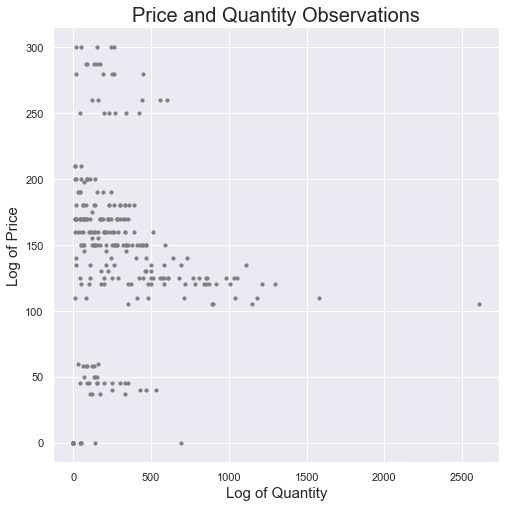

In [21]:
sns.set()
fig_static = plt.figure(figsize = (8,8))
plt.scatter(data['promo_volume'],data['promo_price'], s = 10, c = 'gray')
plt.ylabel('Log of Price', fontsize = 15)
plt.xlabel('Log of Quantity', fontsize = 15)
plt.title('Price and Quantity Observations', fontsize = 20)
plt.show()

In [22]:
elasticity = data[["regular_elasticity", "promo_elasticity"]]
pd.DataFrame({"unique":"Unique Value","Regular Elasticity":elasticity['regular_elasticity'].unique(),
              "Promo Elasticity":elasticity['promo_elasticity'] \
              .unique()}).set_index("unique")

,Regular Elasticity,Promo Elasticity
unique,,
Unique Value,0.409191,1.477924


### Final Assumptions:

In this presentation/report, Depending on the price and quantity for each sku_cde and by calculating the Regular and promo elasticity for each product. We can see by applying the statistical techniques;

1. Is sku_cde (A) The elastic and inelastic for promo and regular demand ?

First, For regular demand the elasticity is too less that suggest that the demand for the product or item is less than proportionally affected by the change in its price. The value is less than 1. So here the demand is relatively insentitive to price or inelastic.
Secondly, For promo demand the elasticity is higher than 1.0 means that the demand for the product or item is higher than proportionally affected by the change in its price. The value is greater than 1.0. So the demand is relatively sentitive to price and viceverse, Elastic.

2. Should we increase or decrease the prices based on the elasticities (promo or regular) of the items ?

So if the demand of the product or item is elastic at the price level, then the team should cut the price, because the percentage drop in price will result in an even larger percentage increase in the quantity sold. thus always rising the revenue. 

In [23]:
data = data.fillna(0)

In [26]:
data.to_csv("data-pe.csv", index=False)

In [55]:
regular = data[["cost_price","regular_price","regular_volume","regular_pe"]]
promo = data[["cost_price","promo_price","promo_volume","promo_pe"]]

In [60]:
import numpy as np
regular['regular_pe'] = regular['regular_pe'].apply(remove_inf)
promo['promo_pe'] = promo['promo_pe'].apply(remove_inf)

In [59]:
def remove_inf(data):
    if (data == np.inf) or (data == -np.inf):
        data = 0
    return data

In [64]:
regular.to_csv("regular.csv",index=False)
promo.to_csv("promo.csv",index=False)

In [62]:
regular = regular.append(regular.loc[:150],ignore_index=True)
promo = promo.append(promo.loc[:150],ignore_index=True)

In [63]:
regular

,cost_price,regular_price,regular_volume,regular_pe
0,68.0,140.0,10.0,0.000000
1,180.0,300.0,10.0,0.000000
2,26.0,56.0,40.0,-3.688525
3,80.0,0.0,0.0,1.000000
4,94.0,205.0,20.0,0.000000
5,26.0,56.0,200.0,-12.382550
6,68.0,140.0,50.0,-0.500000
7,180.0,300.0,290.0,4.200000
8,52.0,0.0,0.0,1.000000
9,80.0,0.0,0.0,0.000000
